In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df1=pd.read_csv("Algerian_forest_fires_dataset_cleaned.csv")


In [3]:
df1.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
# drop day,month,year
df1=df1.drop(['day','month','year'],axis=1)


In [5]:
df1.head()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df1['Classes'].unique()


array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [7]:
df1['Classes']=df1['Classes'].str.strip()


In [8]:
df1['Classes'].unique()


array(['not fire', 'fire'], dtype=object)

In [9]:
df1['Classes']=df1["Classes"].map({'fire':1,'not fire':0})


In [10]:
df1.head()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [11]:
df1['Classes'].value_counts()


Classes
1    137
0    106
Name: count, dtype: int64

In [12]:
## independent and dependent features
X=df1.drop('FWI',axis=1)
Y=df1['FWI']


In [13]:
X


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [14]:
Y


0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [15]:
# train test and split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


In [16]:
X_train.shape


(182, 11)

In [17]:
Y_train.shape


(182,)

In [18]:
X_test.shape


(61, 11)

In [19]:
Y_test.shape


(61,)

In [20]:
X_train.corr()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

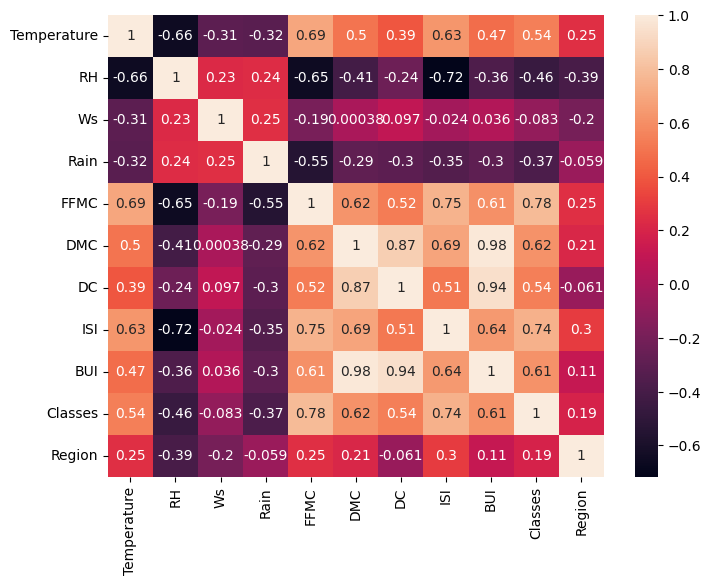

In [21]:
## feature selection 
## check for multicollinearity
corr=X_train.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True)


In [22]:
# remove highly positively correlated features
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [23]:

corr_features=correlation(X_train,.85)
corr_features


{'BUI', 'DC'}

In [24]:
X_train.shape


(182, 11)

In [25]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)


In [26]:
X_train.shape


(182, 9)

In [27]:

X_test.shape


(61, 9)

In [28]:
# feature scaling or standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


Text(0.5, 1.0, 'After Standardization')

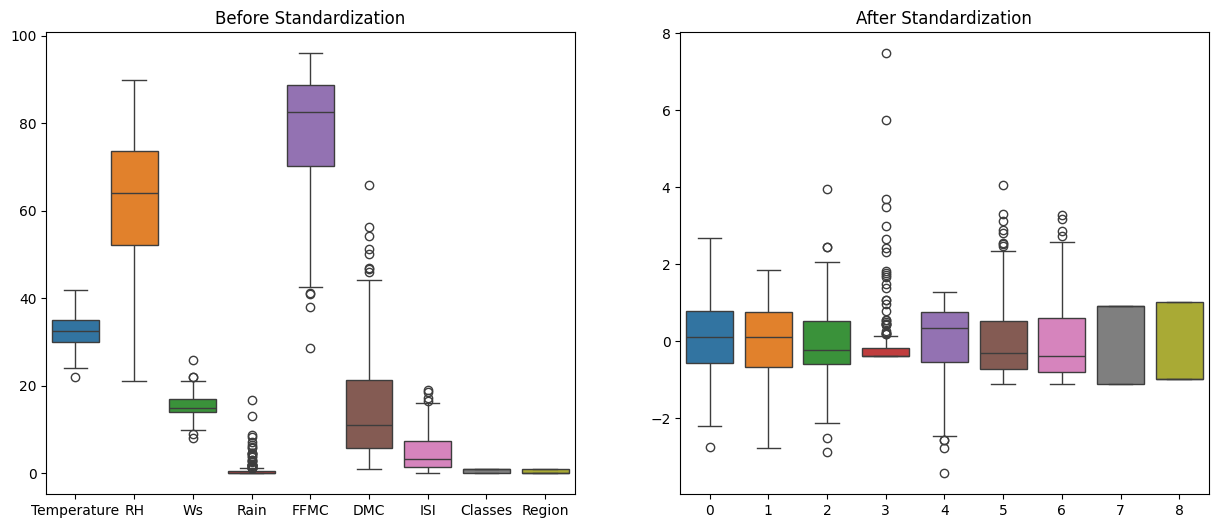

In [29]:
# box plot to understand effect of stanardization
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("Before Standardization")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("After Standardization")


### linear regression model

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
linear=LinearRegression()
linear.fit(X_train_scaled,Y_train)
Y_pred=linear.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R2 Score:",r2)


Mean Absolute Error: 0.546823646524997
Mean Squared Error: 0.6742766873791582
R2 Score: 0.9847657384266951


In [31]:
print("Coefficients:",linear.coef_)
print("Intercept:",linear.intercept_)


Coefficients: [-0.03634495 -0.17441065  0.00703214 -0.04108155 -0.82319823  3.6982583
  4.84057298  0.40422124 -0.39259928]
Intercept: 7.156043956043957


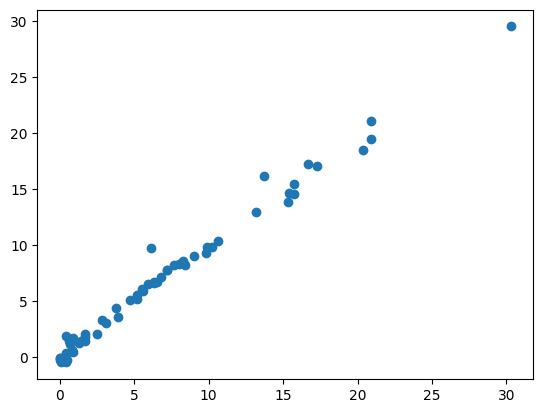

In [32]:
plt.scatter(Y_test,Y_pred)


# Lasso Regression model

In [33]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
lasso=Lasso()
lasso.fit(X_train_scaled,Y_train)
Y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R2 Score:",r2)


Mean Absolute Error: 1.133175994914409
Mean Squared Error: 2.248345891897477
R2 Score: 0.9492020263112388


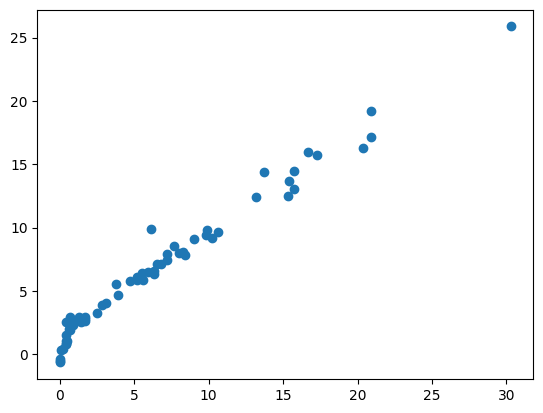

In [34]:
plt.scatter(Y_test,Y_pred)


# ridge regression model

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
ridge=Ridge()
ridge.fit(X_train_scaled,Y_train)
Y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R2 Score:",r2)


Mean Absolute Error: 0.5642305340105691
Mean Squared Error: 0.6949198918152073
R2 Score: 0.9842993364555513


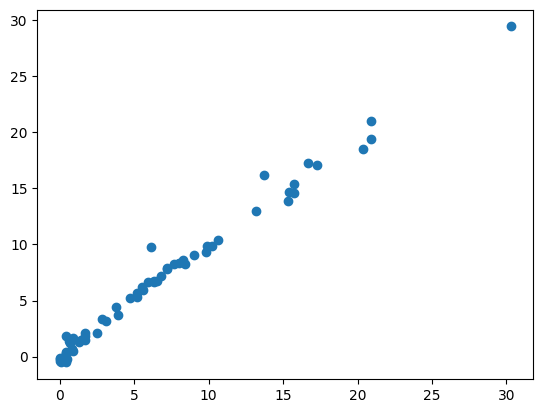

In [36]:
plt.scatter(Y_test,Y_pred)


# Elasticnet Regression model

In [37]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
elastic=ElasticNet()
elastic.fit(X_train_scaled,Y_train)
Y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R2 Score:",r2)


Mean Absolute Error: 1.8822353634896
Mean Squared Error: 5.517251101025224
R2 Score: 0.8753460589519703


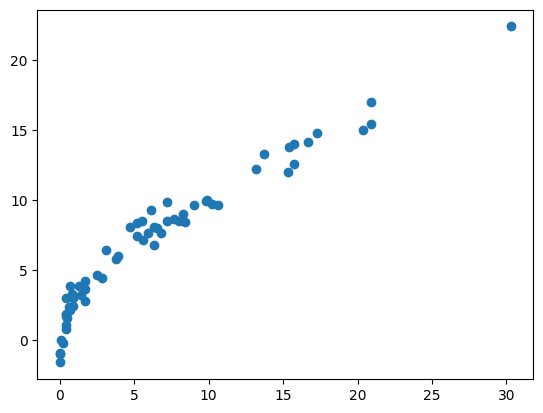

In [38]:
plt.scatter(Y_test,Y_pred)


# cross validation lasso

lassocv

In [ ]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,Y_train)


,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [ ]:
lassocv.predict(X_test_scaled)


array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [ ]:
lassocv.alpha_


np.float64(0.05725391318234408)

In [ ]:
lassocv.alphas_


array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [ ]:
lassocv.mse_path_


array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

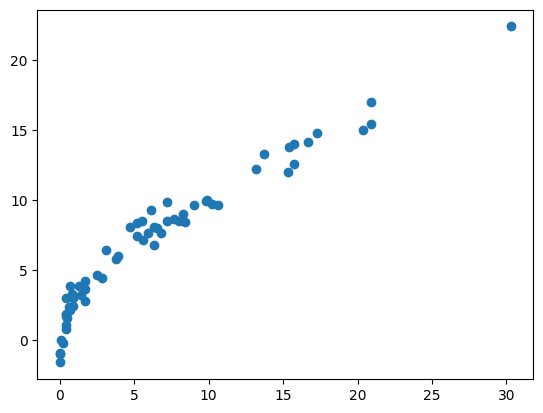

In [ ]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(Y_test,Y_pred)


In [ ]:
r2_score(Y_test,y_pred)


0.9820946715928275

ridgecv

In [ ]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,Y_train)
y_pred=ridgecv.predict(X_test_scaled)

mse=mean_squared_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)
print("Mean Squared Error:",mse)
print("R2 Score:",r2)


Mean Squared Error: 0.6949198918152073
R2 Score: 0.9842993364555513


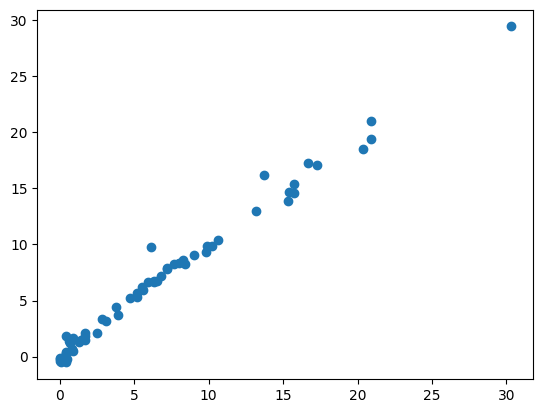

In [ ]:
plt.scatter(Y_test,y_pred)


In [ ]:
ridgecv.alpha_


np.float64(1.0)

In [ ]:
ridgecv.alphas


(0.1, 1.0, 10.0)

In [ ]:
ridgecv.get_params()


{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

elasticnet cv

In [ ]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,Y_train)   
y_pred=elasticcv.predict(X_test_scaled)
mse=mean_squared_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)
print("Mean Squared Error:",mse)
print("R2 Score:",r2)


Mean Squared Error: 0.8222830416276264
R2 Score: 0.9814217587854941


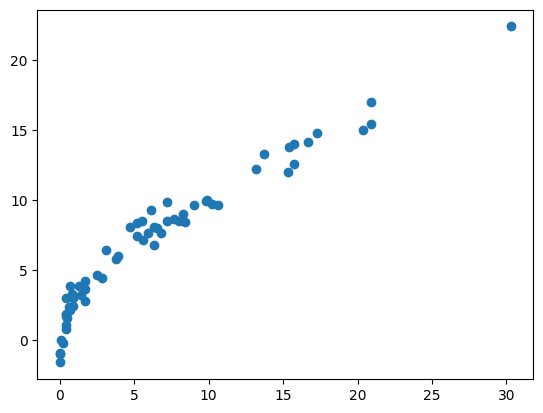

In [ ]:
plt.scatter(Y_test,Y_pred)


In [ ]:
elasticcv.alphas_


array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

In [ ]:
scaler


,copy,True
,with_mean,True
,with_std,True


In [ ]:
ridge


,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [ ]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('regression.pkl','wb'))
